In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

In [ ]:
df = pd.read_table('/content/Q3_fruit_data_with_colors.txt')
df[:10]

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


creating dictionary for fruit types and count each type

In [ ]:
fruit_dic = {}
for i in range(len(df)):
  if df[['fruit_name']].iloc[i].fruit_name in fruit_dic:
    fruit_dic[df['fruit_name'].iloc[i]].add(df[['fruit_subtype']].iloc[i].fruit_subtype)
  else:
    fruit_dic[df['fruit_name'].iloc[i]] = {df[['fruit_subtype']].iloc[i].fruit_subtype}
print(fruit_dic)
print(df[['fruit_name','fruit_subtype']].value_counts())

{'apple': {'cripps_pink', 'golden_delicious', 'braeburn', 'granny_smith'}, 'mandarin': {'mandarin'}, 'orange': {'spanish_jumbo', 'selected_seconds', 'turkey_navel'}, 'lemon': {'spanish_belsan', 'unknown'}}
fruit_name  fruit_subtype   
lemon       unknown             10
orange      turkey_navel        10
apple       cripps_pink          6
lemon       spanish_belsan       6
orange      selected_seconds     6
apple       braeburn             5
            golden_delicious     5
mandarin    mandarin             5
apple       granny_smith         3
orange      spanish_jumbo        3
dtype: int64


plloting features distributoins

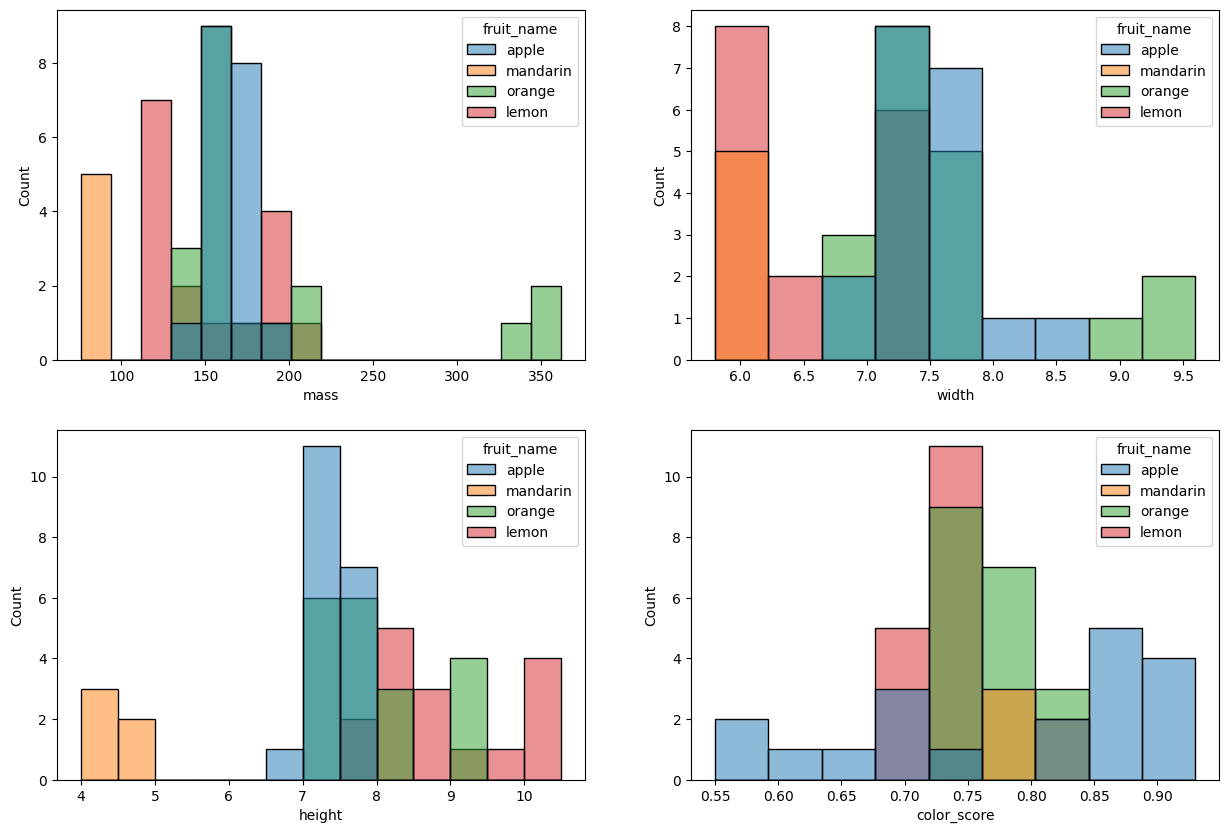

In [ ]:
fig , ax = plt.subplots(2,2,figsize=(15,10))
sns.histplot(df,ax = ax[0,0],x = 'mass', hue = 'fruit_name')
sns.histplot(df,ax = ax[0,1],x = 'width', hue = 'fruit_name')
sns.histplot(df,ax = ax[1,0],x = 'height', hue = 'fruit_name')
sns.histplot(df,ax = ax[1,1],x = 'color_score', hue = 'fruit_name')
plt.show()

# KNN

## finding best k

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

all features

In [ ]:
y = df[['fruit_label']]
x = df[['mass','width','height','color_score']]
x_train, x_test, y_train , y_test = train_test_split(x , y,test_size = 0.4)

explore best k for nearest neighbors.limits of nieghbors consider between 20 and 30

In [ ]:
x_train2 = StandardScaler().fit_transform(x_train)
x_test2 = StandardScaler().fit_transform(x_test)
knn = KNeighborsClassifier()
knn_dic = {}
for i in range(20,31):
  knn = KNeighborsClassifier(i)
  knn_dic[f'{i} near neghbors'] = knn.fit(x_train2,np.array(y_train).reshape(-1))


In [ ]:
f1_train = {}
for i in range(20,31):
  y_hat = knn_dic[list(knn_dic.keys())[i-20]].predict(x_train2)
  f1_train[i] = metrics.f1_score(y_train,y_hat,average = 'macro')
print('for train set f1 scores for k neareset neighbor is:')
display(f1_train)


for train set f1 scores for k neareset neighbor is:


{20: 0.4134316770186335,
 21: 0.44972471747319614,
 22: 0.44972471747319614,
 23: 0.4991039426523297,
 24: 0.4368421052631579,
 25: 0.34090909090909094,
 26: 0.34090909090909094,
 27: 0.32954545454545453,
 28: 0.2552845528455285,
 29: 0.22619047619047616,
 30: 0.1276595744680851}

In [ ]:
f1_test = {}
for i in range(20,31):
  y_hat = knn_dic[list(knn_dic.keys())[i-20]].predict(x_test2)
  f1_test[i] = metrics.f1_score(y_test,y_hat,average = 'macro')
print('for test set f1 scores for k neareset neighbor is:')
display(f1_test)

for test set f1 scores for k neareset neighbor is:


{20: 0.425,
 21: 0.3827985739750446,
 22: 0.38026315789473686,
 23: 0.34692982456140353,
 24: 0.3035714285714286,
 25: 0.28273809523809523,
 26: 0.32298136645962733,
 27: 0.2589285714285714,
 28: 0.26111111111111107,
 29: 0.21825396825396826,
 30: 0.11290322580645161}

**highest score for train is 23 near point**

## finding best 3 combination of features

In [ ]:
from itertools import combinations
knn_dic3 = {}
for i in combinations(x_train.columns,3):
  x_train3 = x_train[list(i)]
  x_train3 = StandardScaler().fit_transform(x_train3)
  knn_model = KNeighborsClassifier(23)
  knn_dic3[i] = knn_model.fit(x_train3,np.array(y_train).reshape(-1))
knn_dic3

**predict**

In [ ]:
f1_score3 = {}
for i in knn_dic3.keys():
  x_test3 = StandardScaler().fit_transform(x_test[list(i)])
  y_hat = knn_dic3[i].predict(x_test3)
  f1_score3[i] = metrics.f1_score(y_test,y_hat,average = 'macro')

f1_score3

{('mass', 'width', 'height'): 0.11666666666666667,
 ('mass', 'width', 'color_score'): 0.3660714285714286,
 ('mass', 'height', 'color_score'): 0.36495726495726494,
 ('width', 'height', 'color_score'): 0.3495813397129186}

as it has been shown the best combination is (mass , width , color score) for predict the label of fruit

## finding best single feature

In [ ]:
from itertools import combinations
knn_dic1 = {}
for i in combinations(x_train.columns,1):
  x_train1 = x_train[list(i)]
  x_train1 = StandardScaler().fit_transform(x_train1)
  knn_model = KNeighborsClassifier(23)
  knn_dic1[i] = knn_model.fit(x_train1,np.array(y_train).reshape(-1))
knn_dic1

{('mass',): KNeighborsClassifier(n_neighbors=23),
 ('width',): KNeighborsClassifier(n_neighbors=23),
 ('height',): KNeighborsClassifier(n_neighbors=23),
 ('color_score',): KNeighborsClassifier(n_neighbors=23)}

In [ ]:
f1_score1 = {}
for i in knn_dic1.keys():
  x_test1 = StandardScaler().fit_transform(x_test[list(i)])
  y_hat = knn_dic1[i].predict(x_test1)
  f1_score1[i] = metrics.f1_score(y_test,y_hat,average = 'macro')

f1_score1

{('mass',): 0.1346153846153846,
 ('width',): 0.14,
 ('height',): 0.22962962962962963,
 ('color_score',): 0.47916666666666663}

as  it has been shown the best single feature is color score